# Webscraping of Understat using the Understat module



**By Jose Gonzalez**


**The Understat module was developed by Amos Sebastian here is the [Understat webpage](https://understat.readthedocs.io/en/latest/classes/understat.html#the-functions)**

![ ](https://images.hive.blog/1200x630/https://cdn.steemitimages.com/DQmNe1biaFMUVZ67VzggbsqFnERupsMeekEHQvAMmSTngMG/understat.png )

Using the great module created by Amos Sebastian that functions with the [Asyncio library](https://docs.python.org/3/library/asyncio.html) , we'll proceed to scrape the data from Understat.

[Here you can find the functions and code he uses ](https://github.com/amosbastian/understat/tree/master/understat)

**[Most importantly here you have all the examples available for this module](https://understat.readthedocs.io/en/latest/classes/understat.html#the-functions)**

<a id="1."></a>
# 1. Introduction 
This is the beggining of my Understat series in which I intent to using 3 different methods to scrape data from [Understat](https://understat.com/) using Selenium, The Understat module created by [Amos Sebastian](https://understat.readthedocs.io/en/latest/) and Beautiful Soup, heavily inspired by McKay [Johns tutorials](https://www.youtube.com/c/mckayjohns). After scraping the data from Understat, I intent to plot it by using [MPLSoccer libray](https://mplsoccer.readthedocs.io/en/latest/gallery/index.html), perform analysis based off xG data scraped as well creating our own shotmaps and plot starting from scratch.

This notebook's made to scrape football statistics from the incredible webpage Understat using **The Understat module created by Amos Sebastian.**

<a id="1.1"></a>
## 1.1. Notebook content

* [1. Introduction](#1.)
    - [1.1. Notebook Content.](#1.1)
* [2.Importing libraries.](#2.)
* [3.Player data.](#3.)
    - [3.1. Player grouped stat.](#3.1)
    - [3.2. Shot data.](#3.2)
    - [3.3. Match data.](#3.3)
    - [3.4. Radar data.](#3.4)
* [4. Match data](#4.)
    - [4.1. Shot data.](#4.1)
    - [4.2. Player match info](#4.2)
* [5. Get table](#5.)
    * [6. Stats for every league](#6.)

<a id="2."></a>
# 2. Importing libraries

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import asyncio
import json
import aiohttp
from understat import Understat
import nest_asyncio
# to avoid errors apply the nest asyncio 
nest_asyncio.apply()


<a id="3."></a>
# 3. Players data

In this section we'll be focusing on the data we can obtain from a player ID link, [in this case Sergio Aguero](https://understat.com/player/619), meaning all the stats and shots and everything from the Website Understat and a player link.
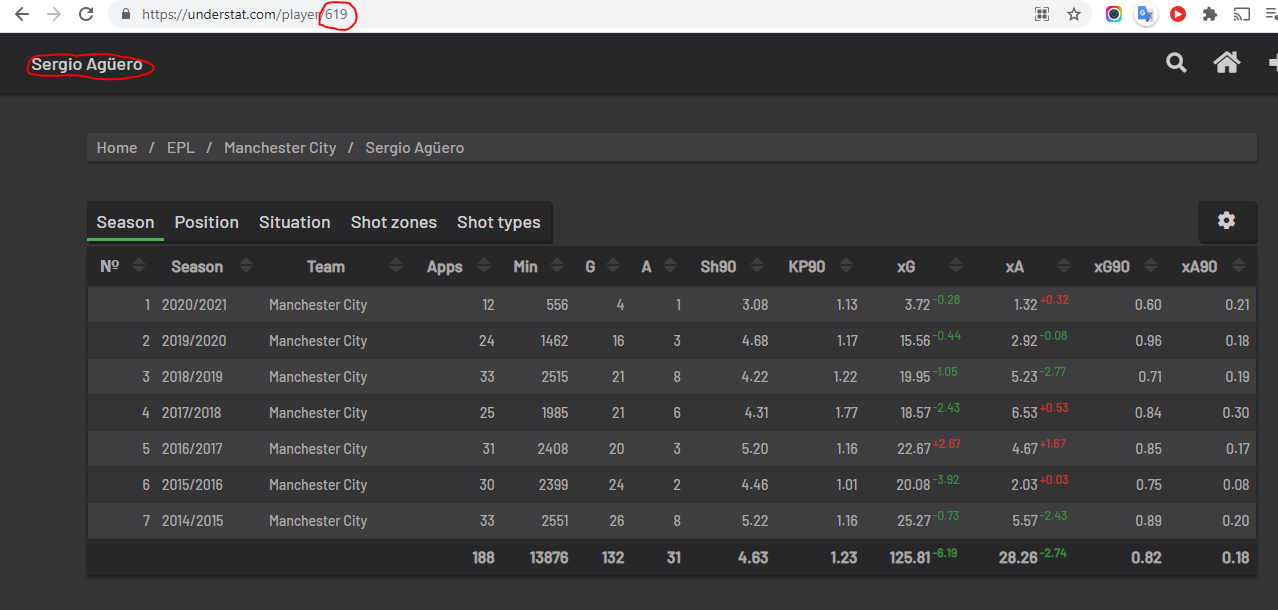

<a id="3.1"></a>
## 3.1. Players grouped data

Keep in mind to mark the difference between the json data and the dict data, in the examples performed by Amos he transforms the grouped_stats data into json.

In [10]:
async with aiohttp.ClientSession() as session:
    understat = Understat(session)
    grouped_stats = await understat.get_player_grouped_stats(619)
    

We'll proceed to check the keys because as it is , we cannot create a dataframe for grouped_stats

In [11]:
grouped_stats.keys()

dict_keys(['season', 'position', 'situation', 'shotZones', 'shotTypes'])

Selecting Sergio Aguero stats by season, meaning this stats from the page 

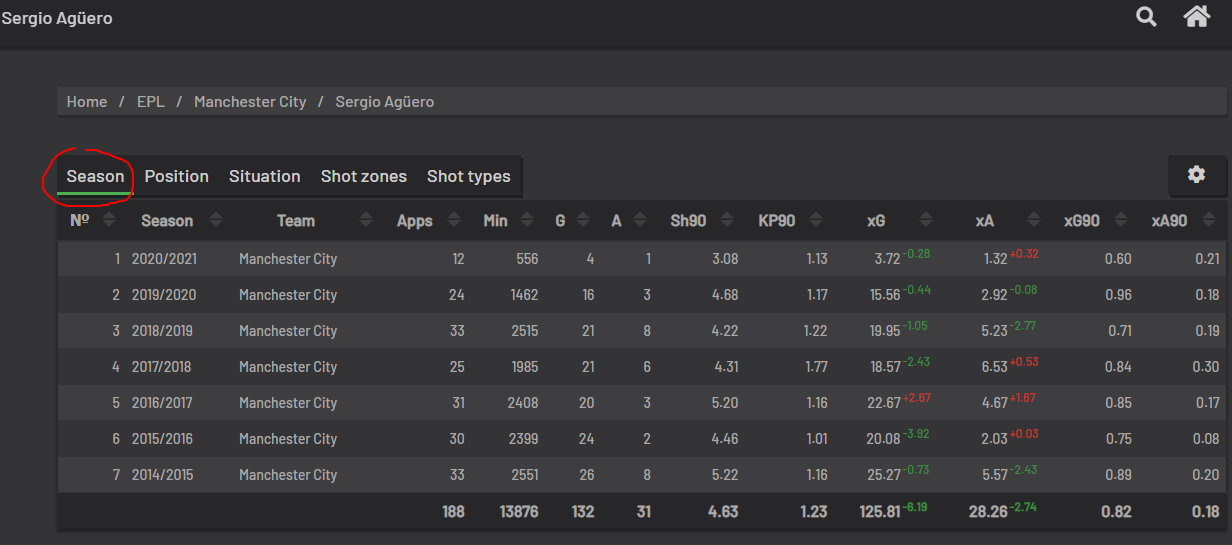

In [12]:
df = pd.DataFrame(grouped_stats['season']).set_index('season')
print('These are Sergio Aguero stats by seasons')
display(df)

These are Sergio Aguero stats by seasons


,position,games,goals,shots,time,xG,assists,xA,key_passes,team,yellow,red,npg,npxG,xGChain,xGBuildup
season,,,,,,,,,,,,,,,,
2020,FW,12,4,19,556,3.716518562287092,1,1.315659787505865,7,Manchester City,0,0,3,2.1941808788105845,4.158569987863302,1.2831713519990444
2019,Sub,24,16,76,1462,15.557500325143337,3,2.9202088303864002,19,Manchester City,1,0,14,13.274030677974224,16.878254003822803,2.644766173325479
2018,FW,33,21,118,2515,19.9491464830935,8,5.22924312017858,34,Manchester City,3,0,19,18.426808904856443,28.70022003352642,8.100998356938362
2017,FW,25,21,95,1985,18.56861797720194,6,6.533229699358344,39,Manchester City,2,0,17,15.523942567408085,23.707814872264862,7.512718818150461
2016,FW,31,20,139,2408,22.672585003077984,3,4.665906261652708,31,Manchester City,4,1,16,18.866740860044956,25.35206551104784,5.0266740852966905
2015,Sub,30,24,119,2399,20.077213659882545,2,2.0287597198039293,27,Manchester City,1,0,20,16.271369472146034,18.786789989098907,3.925958522595465
2014,Sub,33,26,148,2551,25.270159743726254,8,5.568922242149711,33,Manchester City,4,0,21,20.70318364351988,27.805154908448458,6.878173082135618


Luckily the season key for grouped_stats was not nested, in other words, did not have dictionaries inside the keys , that's why the dataframe is easily created.

Now let's change the key and see that for the key "situation" we have dictionaries inside the keys meaning we still have to call those keys to create the correct DataFrame

In [13]:
df = pd.DataFrame(grouped_stats['situation']).T
print('These are Sergio Aguero stats by situation')
display(df)

These are Sergio Aguero stats by situation


,OpenPlay,FromCorner,Penalty,SetPiece,DirectFreekick
2015,"{'situation': 'OpenPlay', 'season': '2015', 'g...","{'situation': 'FromCorner', 'season': '2015', ...","{'situation': 'Penalty', 'season': '2015', 'go...","{'situation': 'SetPiece', 'season': '2015', 'g...","{'situation': 'DirectFreekick', 'season': '201..."
2016,"{'situation': 'OpenPlay', 'season': '2016', 'g...","{'situation': 'FromCorner', 'season': '2016', ...","{'situation': 'Penalty', 'season': '2016', 'go...","{'situation': 'SetPiece', 'season': '2016', 'g...","{'situation': 'DirectFreekick', 'season': '201..."
2017,"{'situation': 'OpenPlay', 'season': '2017', 'g...","{'situation': 'FromCorner', 'season': '2017', ...","{'situation': 'Penalty', 'season': '2017', 'go...","{'situation': 'SetPiece', 'season': '2017', 'g...","{'situation': 'DirectFreekick', 'season': '201..."
2018,"{'situation': 'OpenPlay', 'season': '2018', 'g...","{'situation': 'FromCorner', 'season': '2018', ...","{'situation': 'Penalty', 'season': '2018', 'go...","{'situation': 'SetPiece', 'season': '2018', 'g...","{'situation': 'DirectFreekick', 'season': '201..."
2014,"{'situation': 'OpenPlay', 'season': '2014', 'g...","{'situation': 'FromCorner', 'season': '2014', ...","{'situation': 'Penalty', 'season': '2014', 'go...","{'situation': 'SetPiece', 'season': '2014', 'g...",NaN
2019,"{'situation': 'OpenPlay', 'season': '2019', 'g...","{'situation': 'FromCorner', 'season': '2019', ...","{'situation': 'Penalty', 'season': '2019', 'go...","{'situation': 'SetPiece', 'season': '2019', 'g...",NaN
2020,"{'situation': 'OpenPlay', 'season': '2020', 'g...","{'situation': 'FromCorner', 'season': '2020', ...","{'situation': 'Penalty', 'season': '2020', 'go...",NaN,NaN


As you were able to observe, it's highly nested , we can unnest it by using the apply function for a series and create an unnested DataFrame

In [14]:
df['FromCorner'].apply(pd.Series)

,situation,season,goals,shots,xG,assists,key_passes,xA,npg,npxG,time
2015,FromCorner,2015,2,11,1.8276203628629446,0,0,0,2,1.8276203628629446,2399
2016,FromCorner,2016,1,10,1.0370104163885117,0,1,0.024524617940187454,1,1.0370104163885117,2408
2017,FromCorner,2017,1,4,0.7429725825786591,0,0,0,1,0.7429725825786591,1985
2018,FromCorner,2018,0,7,0.42531011905521154,0,2,0.06617902778089046,0,0.42531011905521154,2515
2014,FromCorner,2014,1,12,1.8788630235940218,1,1,0.9460826516151428,1,1.8788630235940218,2551
2019,FromCorner,2019,0,6,0.7109498158097267,0,2,0.20496290177106857,0,0.7109498158097267,1462
2020,FromCorner,2020,0,2,0.07958348654210567,0,0,0,0,0.07958348654210567,556


<a id="3.2"></a>
## 3.2. Players shot

Now let's scrape the shot data for Sergio Aguero's entire career 

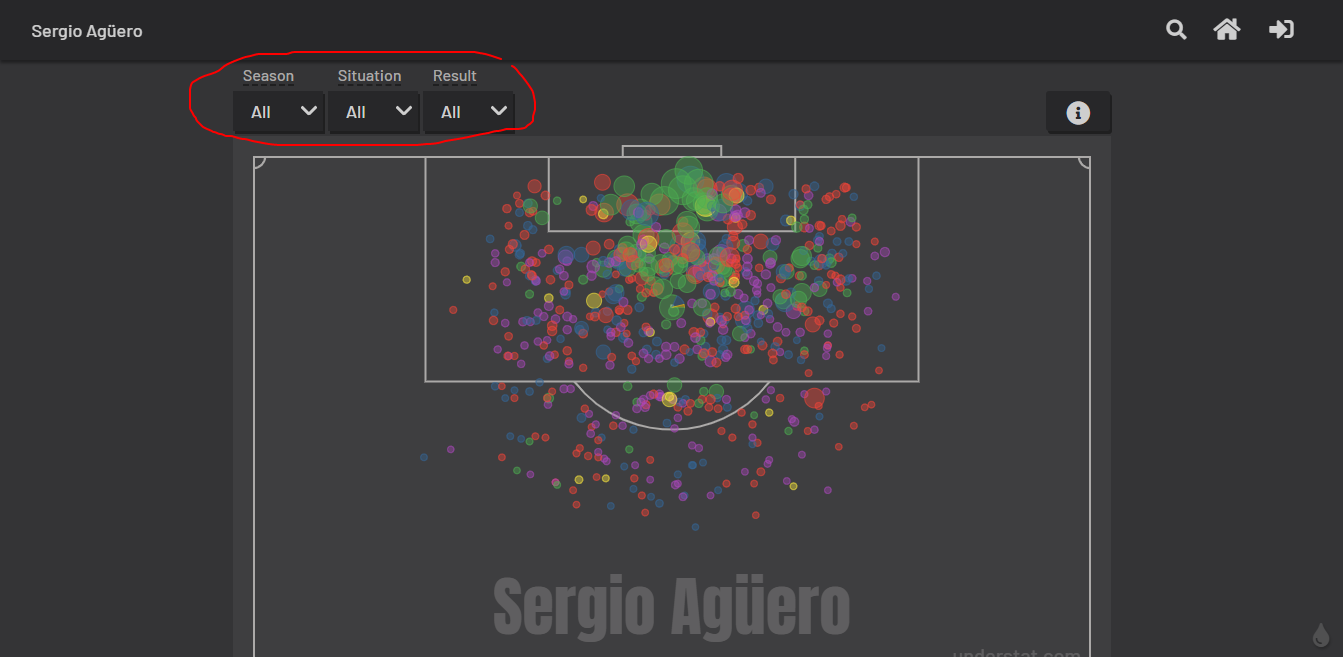


I highlighted in red the elements in which you can filter the data on the Understat webpage and now we can do that ourselves by using Pandas and by Using **Kwargs**

In [15]:
 async with aiohttp.ClientSession() as session:
        understat = Understat(session)
        player_shots = await understat.get_player_shots(
            619)
        shots = pd.DataFrame(player_shots)

In [16]:
shots

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,14553,91,Goal,0.9530000305175781,0.655,0.299155592918396,Sergio Agüero,a,619,OpenPlay,2014,RightFoot,4757,Newcastle United,Manchester City,0,2,2014-08-17 16:00:00,None,Rebound
1,14552,91,SavedShot,0.9259999847412109,0.6809999847412109,0.0791548416018486,Sergio Agüero,a,619,OpenPlay,2014,LeftFoot,4757,Newcastle United,Manchester City,0,2,2014-08-17 16:00:00,Fernandinho,Pass
2,14792,68,Goal,0.899000015258789,0.3240000152587891,0.35958579182624817,Sergio Agüero,h,619,OpenPlay,2014,RightFoot,4768,Manchester City,Liverpool,3,1,2014-08-25 20:00:00,Jesús Navas,Throughball
3,14797,94,MissedShots,0.975999984741211,0.29200000762939454,0.064260333776474,Sergio Agüero,h,619,OpenPlay,2014,RightFoot,4768,Manchester City,Liverpool,3,1,2014-08-25 20:00:00,Fernandinho,Pass
4,14996,65,BlockedShot,0.86,0.649000015258789,0.04344866797327995,Sergio Agüero,h,619,OpenPlay,2014,RightFoot,4770,Manchester City,Stoke,0,1,2014-08-30 15:00:00,Edin Dzeko,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,420218,50,SavedShot,0.7180000305175781,0.47200000762939454,0.013119838200509548,Sergio Agüero,h,619,OpenPlay,2020,RightFoot,14781,Manchester City,Chelsea,1,2,2021-05-08 16:30:00,Ferrán Torres,HeadPass
710,424091,70,Goal,0.885,0.4640000152587891,0.4454546272754669,Sergio Agüero,h,619,OpenPlay,2020,RightFoot,14811,Manchester City,Everton,5,0,2021-05-23 15:00:00,Fernandinho,BallRecovery
711,424092,75,Goal,0.8819999694824219,0.4979999923706055,0.1570996642112732,Sergio Agüero,h,619,OpenPlay,2020,Head,14811,Manchester City,Everton,5,0,2021-05-23 15:00:00,Fernandinho,Cross
712,424093,80,SavedShot,0.9259999847412109,0.29600000381469727,0.054634347558021545,Sergio Agüero,h,619,OpenPlay,2020,RightFoot,14811,Manchester City,Everton,5,0,2021-05-23 15:00:00,None,None


**Filtering the data using kwargs**

It's possible to filter the data even before having the DataFrame 

In [17]:
 async with aiohttp.ClientSession() as session:
        understat = Understat(session)
        player_shots = await understat.get_player_shots(
            619, {"lastAction": "Cross"})
        shots = pd.DataFrame(player_shots)

In [18]:
shots

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,15002,72,MissedShots,0.9009999847412109,0.7140000152587891,0.026835046708583832,Sergio Agüero,h,619,OpenPlay,2014,RightFoot,4770,Manchester City,Stoke,0,1,2014-08-30 15:00:00,Jesús Navas,Cross
1,15758,51,BlockedShot,0.895,0.39799999237060546,0.02040105313062668,Sergio Agüero,a,619,FromCorner,2014,Head,4744,Hull,Manchester City,2,4,2014-09-27 15:00:00,James Milner,Cross
2,16413,48,BlockedShot,0.9269999694824219,0.44099998474121094,0.13335269689559937,Sergio Agüero,h,619,OpenPlay,2014,RightFoot,4699,Manchester City,Tottenham,4,1,2014-10-18 12:45:00,Bacary Sagna,Cross
3,16589,64,ShotOnPost,0.935,0.4779999923706055,0.5044883489608765,Sergio Agüero,a,619,OpenPlay,2014,RightFoot,4709,West Ham,Manchester City,2,1,2014-10-25 12:45:00,Jesús Navas,Cross
4,16029,20,SavedShot,0.915,0.47200000762939454,0.518155574798584,Sergio Agüero,h,619,OpenPlay,2014,RightFoot,4656,Manchester City,Manchester United,1,0,2014-11-02 13:30:00,Fernando,Cross
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,352629,8,MissedShots,0.885,0.4490000152587891,0.08800457417964935,Sergio Agüero,a,619,OpenPlay,2019,RightFoot,11890,Tottenham,Manchester City,2,0,2020-02-02 16:30:00,Kyle Walker,Cross
98,352893,69,BlockedShot,0.9359999847412109,0.37599998474121094,0.11990650743246078,Sergio Agüero,h,619,OpenPlay,2019,RightFoot,11898,Manchester City,West Ham,2,0,2020-02-19 19:30:00,Kyle Walker,Cross
99,412763,55,BlockedShot,0.9,0.3820000076293945,0.06540475785732269,Sergio Agüero,a,619,OpenPlay,2020,RightFoot,14730,Leicester,Manchester City,0,2,2021-04-03 16:30:00,Gabriel Jesus,Cross
100,424092,75,Goal,0.8819999694824219,0.4979999923706055,0.1570996642112732,Sergio Agüero,h,619,OpenPlay,2020,Head,14811,Manchester City,Everton,5,0,2021-05-23 15:00:00,Fernandinho,Cross


**Filtering the data using Pandas**



In [19]:
shots[shots['situation']=='OpenPlay']

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,15002,72,MissedShots,0.9009999847412109,0.7140000152587891,0.026835046708583832,Sergio Agüero,h,619,OpenPlay,2014,RightFoot,4770,Manchester City,Stoke,0,1,2014-08-30 15:00:00,Jesús Navas,Cross
2,16413,48,BlockedShot,0.9269999694824219,0.44099998474121094,0.13335269689559937,Sergio Agüero,h,619,OpenPlay,2014,RightFoot,4699,Manchester City,Tottenham,4,1,2014-10-18 12:45:00,Bacary Sagna,Cross
3,16589,64,ShotOnPost,0.935,0.4779999923706055,0.5044883489608765,Sergio Agüero,a,619,OpenPlay,2014,RightFoot,4709,West Ham,Manchester City,2,1,2014-10-25 12:45:00,Jesús Navas,Cross
4,16029,20,SavedShot,0.915,0.47200000762939454,0.518155574798584,Sergio Agüero,h,619,OpenPlay,2014,RightFoot,4656,Manchester City,Manchester United,1,0,2014-11-02 13:30:00,Fernando,Cross
6,23206,70,SavedShot,0.8969999694824219,0.625999984741211,0.05424382910132408,Sergio Agüero,h,619,OpenPlay,2014,LeftFoot,4519,Manchester City,Hull,1,1,2015-02-07 15:00:00,Gaël Clichy,Cross
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,352193,72,Goal,0.970999984741211,0.524000015258789,0.6283474564552307,Sergio Agüero,a,619,OpenPlay,2019,LeftFoot,11875,Sheffield United,Manchester City,0,1,2020-01-21 19:30:00,Kevin De Bruyne,Cross
97,352629,8,MissedShots,0.885,0.4490000152587891,0.08800457417964935,Sergio Agüero,a,619,OpenPlay,2019,RightFoot,11890,Tottenham,Manchester City,2,0,2020-02-02 16:30:00,Kyle Walker,Cross
98,352893,69,BlockedShot,0.9359999847412109,0.37599998474121094,0.11990650743246078,Sergio Agüero,h,619,OpenPlay,2019,RightFoot,11898,Manchester City,West Ham,2,0,2020-02-19 19:30:00,Kyle Walker,Cross
99,412763,55,BlockedShot,0.9,0.3820000076293945,0.06540475785732269,Sergio Agüero,a,619,OpenPlay,2020,RightFoot,14730,Leicester,Manchester City,0,2,2021-04-03 16:30:00,Gabriel Jesus,Cross


<a id="3.3"></a>
##  3.3. Players match data

Let's obtain the matches data for Sergio Aguero's career 

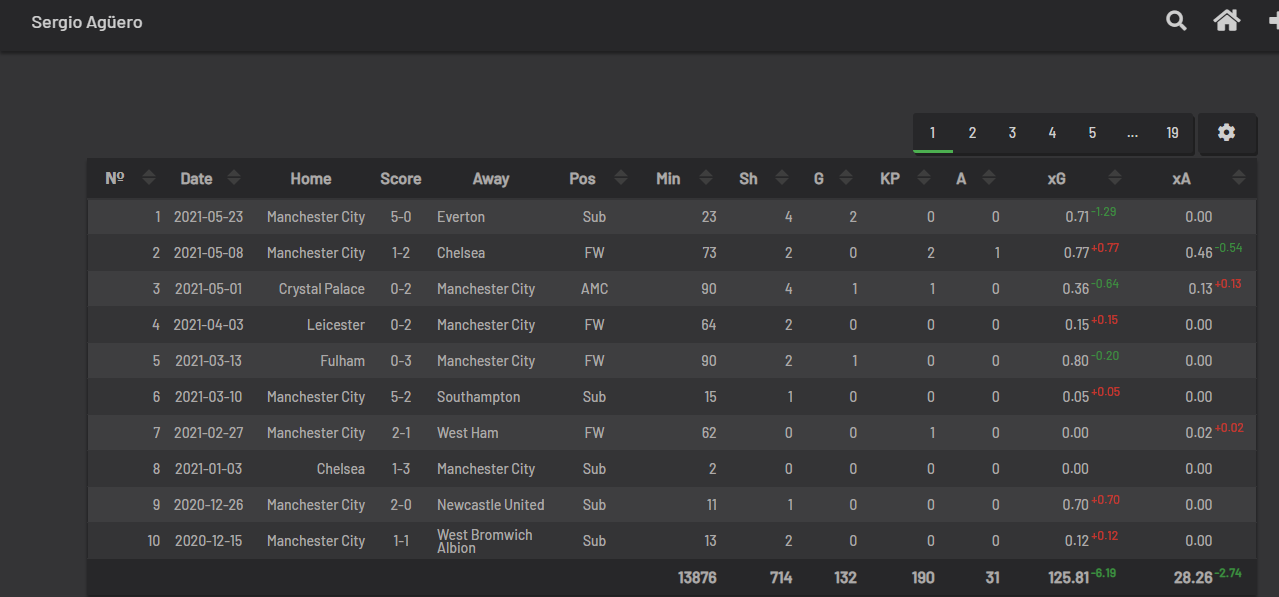

In [20]:
async with aiohttp.ClientSession() as session:
    understat = Understat(session)
    player_matches = await understat.get_player_matches(619)
    df = pd.DataFrame(player_matches)

In [21]:
df

,goals,shots,xG,time,position,h_team,a_team,h_goals,a_goals,date,id,season,roster_id,xA,assists,key_passes,npg,npxG,xGChain,xGBuildup
0,2,4,0.7143030166625977,23,Sub,Manchester City,Everton,5,0,2021-05-23,14811,2020,473403,0,0,0,2,0.7143030166625977,0.7949095368385315,0.13772089779376984
1,0,2,0.7742886543273926,73,FW,Manchester City,Chelsea,1,2,2021-05-08,14781,2020,468847,0.4595739543437958,1,2,0,0.013119838200509548,0.5117536783218384,0.03905986621975899
2,1,4,0.36390894651412964,90,AMC,Crystal Palace,Manchester City,0,2,2021-05-01,14768,2020,466848,0.1255725622177124,0,1,1,0.36390894651412964,0.7608236074447632,0.4958026707172394
3,0,2,0.15265914797782898,64,FW,Leicester,Manchester City,0,2,2021-04-03,14730,2020,459878,0,0,0,0,0.15265914797782898,0.24582615494728088,0.09316699951887131
4,1,2,0.8000686764717102,90,FW,Fulham,Manchester City,0,3,2021-03-13,14708,2020,456648,0,0,0,0,0.03889980912208557,0.03889980912208557,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,0,4,0.18669776618480682,90,FW,Manchester City,Chelsea,1,1,2014-09-21,4737,2014,18253,0,0,0,0,0.18669776618480682,0.19999440014362335,0.04137472063302994
184,1,4,0.7575136423110962,68,FW,Arsenal,Manchester City,2,2,2014-09-13,4719,2014,17879,0.025006527081131935,0,1,1,0.7575136423110962,1.14932382106781,0.39181023836135864
185,0,3,0.13465562462806702,90,FW,Manchester City,Stoke,0,1,2014-08-30,4770,2014,17698,0,0,0,0,0.13465562462806702,0.2636925280094147,0.12903690338134766
186,1,2,0.4238460958003998,20,Sub,Manchester City,Liverpool,3,1,2014-08-25,4768,2014,17450,0,0,0,1,0.4238460958003998,0.4238460958003998,0


As mentioned before, it is possible to filter the data by using kwargs before even having the DataFrame

In [22]:
async with aiohttp.ClientSession() as session:
    understat = Understat(session)
    player_matches = await understat.get_player_matches(
         619, {"h_team": "Manchester United"})
    df = pd.DataFrame(player_matches)

Matches played by Sergio Aguero against Manchester United as a home team

In [23]:
df

,goals,shots,xG,time,position,h_team,a_team,h_goals,a_goals,date,id,season,roster_id,xA,assists,key_passes,npg,npxG,xGChain,xGBuildup
0,0,0,0,61,FW,Manchester United,Manchester City,2,0,2020-03-08,11932,2019,387858,0,0,0,0,0,0.055262573063373566,0.055262573063373566
1,0,2,0.11124962568283081,90,FW,Manchester United,Manchester City,0,2,2019-04-24,9501,2018,327656,0.13235317170619965,0,1,0,0.11124962568283081,0.24360279738903046,0
2,2,5,1.4754852056503296,90,FW,Manchester United,Manchester City,4,2,2015-04-12,4459,2014,23306,0,0,0,2,1.4754852056503296,1.4855852127075195,0.04120262712240219


----

<a id="3.4"></a>
## 3.4. Players radars

Now let's obtain the radar data for Sergio Aguero

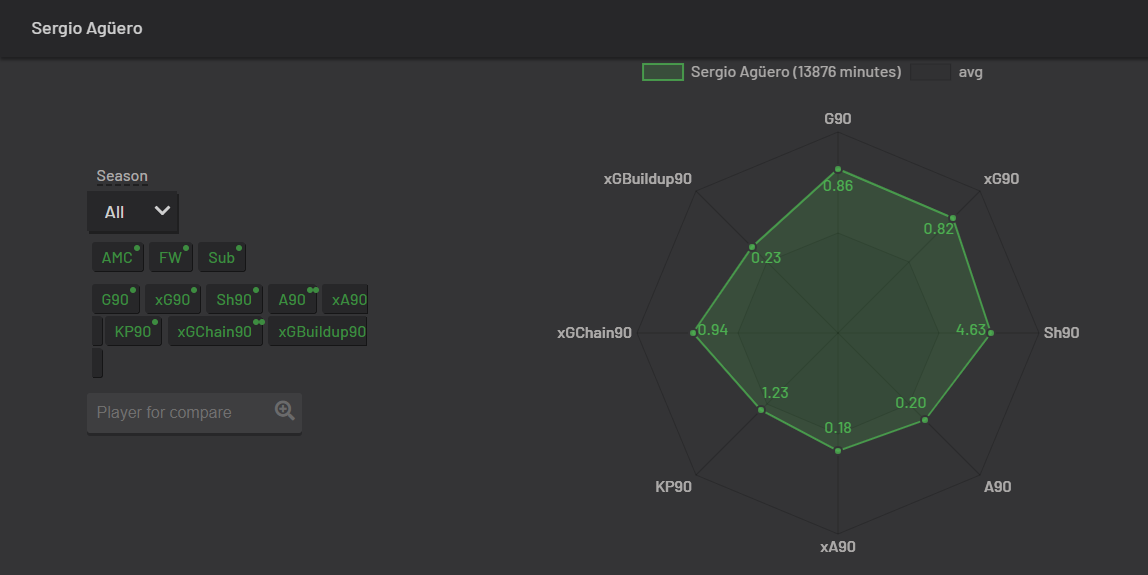

In [24]:
async with aiohttp.ClientSession() as session:
        understat = Understat(session)
        player_stats = await understat.get_player_stats(619, ["FW"])
        #print(json.dumps(player_stats))
        df = pd.DataFrame(player_stats)

As with the other cases, it's nested 

In [25]:
df

,goals,xG,shots,assists,xA,key_passes,xGChain,xGBuildup,position
0,"{'min': 0.0011, 'max': 0.0126, 'avg': 0.0042}","{'min': 0.00172821, 'max': 0.0120816, 'avg': 0...","{'min': 0.015, 'max': 0.0737, 'avg': 0.028}","{'min': 0, 'max': 0.0048, 'avg': 0.0014}","{'min': 0.000264191, 'max': 0.00538174, 'avg':...","{'min': 0.0036, 'max': 0.0309, 'avg': 0.012}","{'min': 0.00272705, 'max': 0.0169137, 'avg': 0...","{'min': 0.000243189, 'max': 0.00671256, 'avg':...",FW


In [26]:
df['goals'].apply(pd.Series)

,min,max,avg
0,0.0011,0.0126,0.0042


<a id="4."></a>
# 4. Match Data

Now we'll focus on scraping all the data possible from a match link ID such as [Leicester 2 vs Tottenham 4](https://understat.com/match/14809)
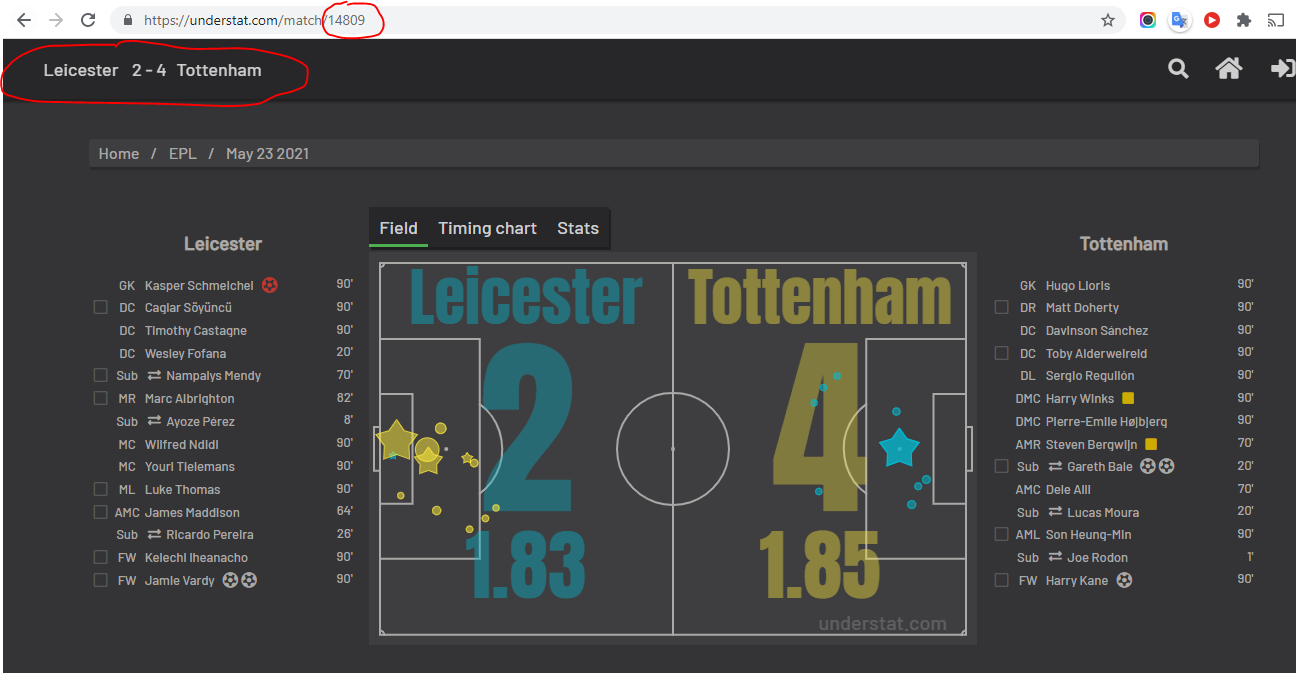


<a id="4.1"></a>
## 4.1. Shots

Let's scrape all the shots for the match, these stats include both teams and it's going to be nested so it's mandatory to create the dataframes for the keys both home and away and then merge them together to finally obtain all the shots for both teams

In [27]:
async with aiohttp.ClientSession() as session:
        understat = Understat(session)
        match = await understat.get_match_shots(14809)
        #print(json.dumps(players))
        

In [28]:
match.keys()

dict_keys(['h', 'a'])

In [29]:
df_a = pd.DataFrame(match['a'])
df_h = pd.DataFrame(match['h'])
df = df_a.append(df_h)
df

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,424024,2,BlockedShot,0.845999984741211,0.715,0.026242658495903015,Son Heung-Min,a,453,OpenPlay,2020,RightFoot,14809,Leicester,Tottenham,2,4,2021-05-23 15:00:00,Sergio Reguilón,Pass
1,424028,24,BlockedShot,0.9630000305175781,0.625,0.020167702808976173,Toby Alderweireld,a,639,FromCorner,2020,Head,14809,Leicester,Tottenham,2,4,2021-05-23 15:00:00,Son Heung-Min,Cross
2,424030,40,BlockedShot,0.8190000152587891,0.6859999847412109,0.028617791831493378,Matt Doherty,a,6852,FromCorner,2020,RightFoot,14809,Leicester,Tottenham,2,4,2021-05-23 15:00:00,Son Heung-Min,Cross
3,424031,40,Goal,0.9159999847412109,0.534000015258789,0.48724424839019775,Harry Kane,a,647,FromCorner,2020,RightFoot,14809,Leicester,Tottenham,2,4,2021-05-23 15:00:00,None,None
4,424035,55,MissedShots,0.8380000305175781,0.5379999923706055,0.058086927980184555,Harry Kane,a,647,OpenPlay,2020,LeftFoot,14809,Leicester,Tottenham,2,4,2021-05-23 15:00:00,Son Heung-Min,TakeOn
5,424038,77,SavedShot,0.9019999694824219,0.665,0.07611790299415588,Son Heung-Min,a,453,OpenPlay,2020,RightFoot,14809,Leicester,Tottenham,2,4,2021-05-23 15:00:00,Gareth Bale,Pass
6,424039,82,BlockedShot,0.8009999847412109,0.6580000305175782,0.02053021267056465,Matt Doherty,a,6852,FromCorner,2020,RightFoot,14809,Leicester,Tottenham,2,4,2021-05-23 15:00:00,Davinson Sánchez,None
7,424041,86,Goal,0.85,0.525,0.08327088505029678,Gareth Bale,a,2251,OpenPlay,2020,LeftFoot,14809,Leicester,Tottenham,2,4,2021-05-23 15:00:00,Harry Kane,Pass
8,424042,87,BlockedShot,0.895,0.445,0.14267465472221375,Harry Kane,a,647,OpenPlay,2020,RightFoot,14809,Leicester,Tottenham,2,4,2021-05-23 15:00:00,Gareth Bale,Throughball
9,424044,95,ShotOnPost,0.9180000305175782,0.5020000076293946,0.532180905342102,Gareth Bale,a,2251,OpenPlay,2020,LeftFoot,14809,Leicester,Tottenham,2,4,2021-05-23 15:00:00,None,None


<a id="4.2"></a>
## 4.2 Players Data

Let's scrape now the general stats for both teams Leicester and Tottenham 

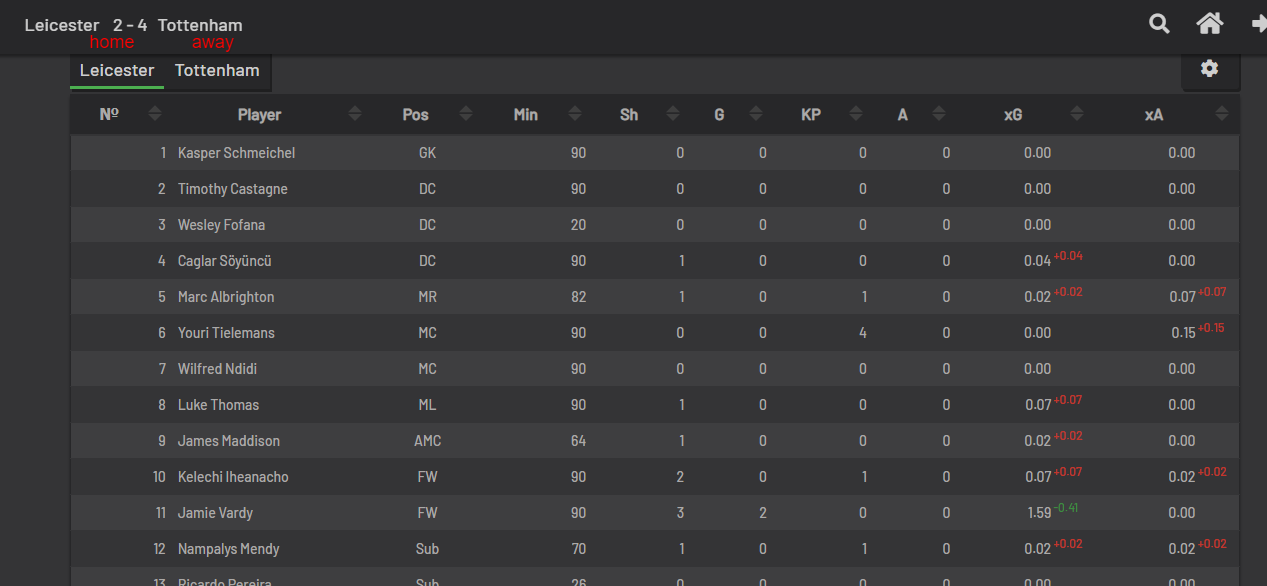

In [30]:
async with aiohttp.ClientSession() as session:
        understat = Understat(session)
        players = await understat.get_match_players(14809)
        # here you can choose the "h" to obtain the players data for the home team
        df = pd.DataFrame(players['a']).T #"a" focusing on the away team, meaning Tottenham

In [31]:
# this time focusing on Tottenham , hence the 'a'
df

,id,goals,own_goals,shots,xG,time,player_id,team_id,position,player,...,yellow_card,red_card,roster_in,roster_out,key_passes,assists,xA,xGChain,xGBuildup,positionOrder
473350,473350,0,0,0,0,90,637,82,GK,Hugo Lloris,...,0,0,0,0,0,0,0,0.026242658495903015,0.026242658495903015,1
473351,473351,0,0,2,0.04914800450205803,90,6852,82,DR,Matt Doherty,...,0,0,0,0,0,0,0,0.026242658495903015,0.026242658495903015,2
473352,473352,0,0,1,0.020167702808976173,90,639,82,DC,Toby Alderweireld,...,0,0,0,0,0,0,0,0.1095135435461998,0.1095135435461998,3
473353,473353,0,0,0,0,90,6249,82,DC,Davinson Sánchez,...,0,0,0,0,1,0,0.02053021267056465,0.1095135435461998,0.1095135435461998,3
473354,473354,0,0,0,0,90,7187,82,DL,Sergio Reguilón,...,0,0,0,0,1,0,0.026242658495903015,0.026242658495903015,0,4
473355,473355,0,0,0,0,90,343,82,DMC,Pierre-Emile Højbjerg,...,0,0,0,0,0,0,0,0.14267465472221375,0.14267465472221375,7
473356,473356,0,0,0,0,90,971,82,DMC,Harry Winks,...,1,0,0,0,0,0,0,0.1023605614900589,0.1023605614900589,7
473357,473357,0,0,0,0,70,8300,82,AMR,Steven Bergwijn,...,1,0,473363,0,0,0,0,0.026242658495903015,0.026242658495903015,11
473358,473358,0,0,0,0,70,645,82,AMC,Dele Alli,...,0,0,473361,0,0,0,0,0.026242658495903015,0.026242658495903015,12
473359,473359,0,0,2,0.1023605614900589,90,453,82,AML,Son Heung-Min,...,0,0,473362,0,3,0,0.10687242448329926,0.24371837079524994,0.1095135435461998,13


<a id="5."></a>
# 5. Get table 

This is the only out of the three methods(Selenium, Beautiful soup and Understat module) the one that actually gets you the actual league's table. 

You must enter two parameters, the league you want to scrape and the year

In [32]:
async with aiohttp.ClientSession() as session:
        understat = Understat(session)
        table = await understat.get_league_table("Bundesliga", "2021")
        df = pd.DataFrame(table)

In [33]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Team,M,W,D,L,G,GA,PTS,xG,NPxG,xGA,NPxGA,NPxGD,xPTS
1,Bayern Munich,34,24,6,4,99,44,78,75.93,68.35,38.87,36.6,31.75,67.04
2,RasenBallsport Leipzig,34,19,8,7,60,32,65,67.14,59.57,29.24,26.96,32.6,71.42
3,Borussia Dortmund,34,20,4,10,75,46,64,68.91,63.55,38.84,35.05,28.5,65.61
4,Wolfsburg,34,17,10,7,61,37,61,51.59,49.32,39.16,35.26,14.06,55.31
5,Eintracht Frankfurt,34,16,12,6,69,53,60,60.53,54.46,47.73,43.06,11.41,56.28
6,Bayer Leverkusen,34,14,10,10,53,39,52,47.28,45,40.41,38.85,6.15,50.01
7,Union Berlin,34,12,14,8,50,43,50,46,40.56,43.51,39.72,0.85,51.71
8,Borussia M.Gladbach,34,13,10,11,64,56,49,54.11,45.77,44.71,40.17,5.61,52.18
9,VfB Stuttgart,34,12,9,13,56,55,45,52.18,46.01,53.79,48.49,-2.48,47.18


<a id="6."></a>
# 6. Stats for every league

This is in case you want to track xG axG by league instead of by teams 

In [34]:
  async with aiohttp.ClientSession() as session:
        understat = Understat(session)
        stats = await understat.get_stats({"league": "EPL", "month": "8"})
        #print(json.dumps(stats))
        df = pd.DataFrame(stats)


In [35]:
df

,league_id,league,h,a,hxg,axg,year,month,matches
0,1,EPL,1.3000,1.4000,1.141921697060267,1.110964298248291,2014,8,30
1,1,EPL,1.1000,1.3750,1.2151590750552714,1.221375621855259,2015,8,40
2,1,EPL,1.2000,1.2000,1.3605596815546355,1.145853524406751,2016,8,30
3,1,EPL,1.3000,1.1333,1.4422248949607213,1.096401752779881,2017,8,30
4,1,EPL,1.6333,1.3333,1.453833992779255,1.4325587471326193,2018,8,30
5,1,EPL,1.4474,1.2895,1.5330126756115963,1.2260847805361998,2019,8,38
